### Introduction

A stroke occurs when a blood vessel in the brain ruptures and bleeds, or when there's a blockage in the blood supply to the brain. The rupture or blockage prevents blood and oxygen from reaching the brain's tissues.

In [1]:
import pandas as pd # For data manupulation.
import seaborn as sns # For visualization
import matplotlib.pyplot as plt # For visualization
import warnings # For suppressing warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading data into a pandas dataframe and printing out its sample.
strokes_data = pd.read_csv("healthcare-dataset-stroke-data.csv")
strokes_data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


Just by looking at the sample of the dataset, we can figure out the columns and the type of data that they contain.

    Observation:

        The id column is a unique identifier.
        The dataset contains both categorical and numerical columns.

    Categorical columns:
        gender: Gender of the patient.
        hypertension: whether the patient suffers from hypertension (1) or not (0).
        heart_disease: whether the patient suffers from heart disease (1) or not (0).
        ever_married: marital status of the patient if married (Yes) else (No).
        work_type: The type of occupation of the patient.
        Resident_Type: The type of residence of patient.
        smoking_status: How often does the patient smokes (if ever).

    Numerical columns:
    
    age: Age of the Patient
    avg_glucose_level: Average Glucose Level of the patient.
    bmi: body mass index of the patient.

    Output Column:
    
    Stroke: Whether the patient is likely to get a stroke (1) or not (0).

In [3]:
# Printing the shape of data to know its size.
strokes_data.shape # 5110 rows and 12 columns

(5110, 12)

In [4]:
strokes_data.columns # Columns present in the dataset

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
# Generate the descriptive statistics
# We can apply the "describe" command to generate the descriptive statistics of the dateset.

strokes_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Observation:

    -There are some Null values in the bmi column. Since its count does not match with the total rows of the column.
    -Average Age of the patient is 43 in the given dataset.
    -The average of hypertension column and heart_disease column is significantly lower than 0.5 (average of 0,1) 
     that means that hardly any of the patient suffers from those in the given dataset.
    -The average glucose level is around 100 which can be considered helathy as well.
    -The mean of stroke is also significantly lower than 0.5 that means that what we have is an imbalanced dataset.


In [6]:
# Since, there are some NA values in the given dataset for the BMI column, We would need to take care of them.
# One such strategy is to simply drop the rows that contain null values. However, before that, let's see 
# whether the concerned rows contain any row that has stroke status as 1

In [7]:
strokes_data[strokes_data['bmi'].isna()]['stroke'].value_counts()

0    161
1     40
Name: stroke, dtype: int64

Since, there are some rows in the dataset where BMI is null but stroke is 1, we will not be removing the rows but rather, impute it with the mean of the column.

In [8]:
mean_value = strokes_data['bmi'].mean() 

strokes_data.fillna(mean_value, inplace = True)

Visualizing the frequency of output column.

0    4861
1     249
Name: stroke, dtype: int64


<AxesSubplot:xlabel='stroke', ylabel='count'>

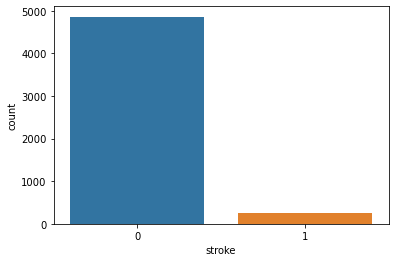

In [9]:

# We are going to use count plot for the same. Countplot is used to show the counts of observations in each 
# categorical bin using bars. A count plot can be thought of as a histogram across a categorical, instead of 
# quantitative, variable.

print(strokes_data['stroke'].value_counts())
sns.countplot(strokes_data['stroke'])

Observation:
    
    There are 2 outcomes in this dataset: 0 and 1 for the likely hood of getting a stroke.
    
    This is an imbalanced dataset since the number of patients that are likely to get a stroke are smaller when compared with the number of patients that did not.

Studying the variables individually and gauging their impact on output column.

Yes    3353
No     1757
Name: ever_married, dtype: int64


<AxesSubplot:xlabel='ever_married', ylabel='count'>

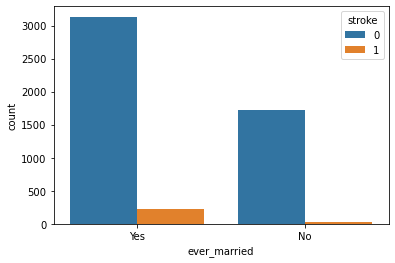

In [10]:
print(strokes_data['ever_married'].value_counts())
sns.countplot(strokes_data['ever_married'],hue = strokes_data['stroke'])

Observation:
    
    Most of the patients are married in the given dataset.
    The marital status by itself is not a significant factor in predicting the likelyhood of a stroke.

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


<AxesSubplot:xlabel='gender', ylabel='count'>

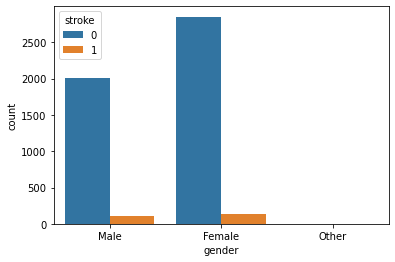

In [11]:
print(strokes_data['gender'].value_counts())
sns.countplot(strokes_data['gender'], hue = strokes_data['stroke'])

Observation:

    There seems to be 1 value of 'Other' in gender which can be ignored for the sake of the analysis
    
    The number of female gender patient is more than the number of male gender patients for both cases.
    
    The Gender variable by itself is not enough to predict the likelyhood of getting a stroke.


0    4834
1     276
Name: heart_disease, dtype: int64


<AxesSubplot:xlabel='heart_disease', ylabel='count'>

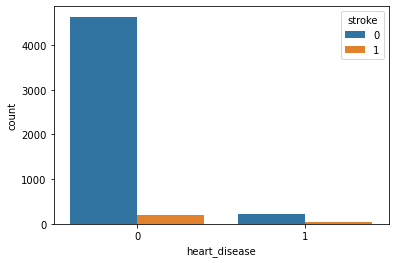

In [12]:
print(strokes_data['heart_disease'].value_counts())
sns.countplot(strokes_data['heart_disease'],  hue = strokes_data['stroke'])

Observation:

    The number of patients suffering from a heart disease is fairly low when compared with patients who don't suffer 
    from one.

<AxesSubplot:xlabel='work_type', ylabel='count'>

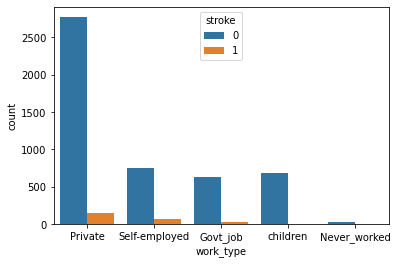

In [13]:
strokes_data['work_type'].value_counts()
sns.countplot(strokes_data['work_type'], hue = strokes_data['stroke'])

Observation:

    We don't have much data on patients that never worked and the one that we do have, never suffered from stroke.
    
    The children category also does not contain any patient that suffered from a stroke.
    
    The above finding does not imply that the mentioned categories don't suffer from stroke, it simply means that we 
    have a small dataset. Of course, it is extremely rare for children to suffer from stroke.
    
    The work_type variable by itself will give us an underfit model.

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


<AxesSubplot:xlabel='Residence_type', ylabel='count'>

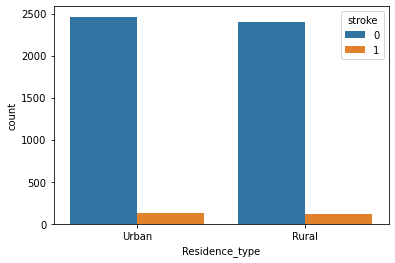

In [14]:
print(strokes_data['Residence_type'].value_counts())
sns.countplot(strokes_data['Residence_type'], hue = strokes_data['stroke'])

Observation:

    Comparable number of patients live in Urban and Rural regions
    
    "Residence_type" columns will also be not good enough by itself.

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

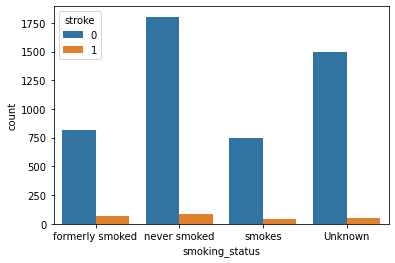

In [15]:
print(strokes_data['smoking_status'].value_counts())
sns.countplot(strokes_data['smoking_status'], hue = strokes_data['stroke'])

Observation:
    
    smoking_status is also not a good indicator by itself of whether the patient is likely to get a stroke.

0    4612
1     498
Name: hypertension, dtype: int64


<AxesSubplot:xlabel='hypertension', ylabel='count'>

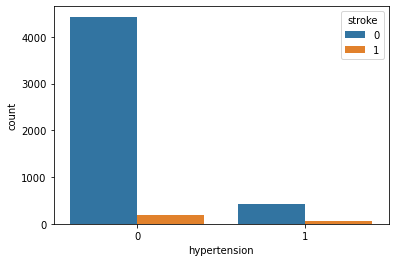

In [16]:
print(strokes_data['hypertension'].value_counts())
sns.countplot(strokes_data['hypertension'], hue = strokes_data['stroke'])

Observation:
    
    Hypertension is also by itself not a good enough variable

Now that we have analyzed all the categorical variables, lets look at the correlation of numeric variables.

We can do so with the help of a heatmap. A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors. The seaborn python package allows the creation of annotated heatmaps.

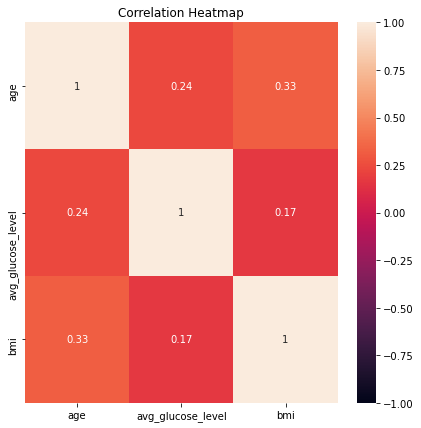

In [17]:
fig, ax = plt.subplots(figsize=(7, 7))

heatmap = sns.heatmap(strokes_data[['age', 'avg_glucose_level', 'bmi']].corr(), 
                      vmin=-1, vmax=1, annot=True,ax = ax )
heatmap.set_title('Correlation Heatmap');

Observation:
    
    There is some positive correlation between age and bmi
    
    Overall, all 3 variables are correlated positively with each other.

We are going to graph a scatter plot among the numeric variables and use colour coding to find if a combination of the used variables have any impact on the output class.

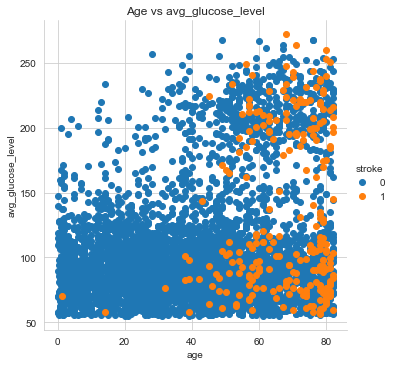

In [18]:
sns.set_style("whitegrid");
sns.FacetGrid(strokes_data, hue="stroke", height=5).map(plt.scatter, "age", "avg_glucose_level").add_legend();
plt.title('Age vs avg_glucose_level')
plt.show();

Observation:

    - Having more age increases the likelyhood of getting a stroke.

    - We can see that almost all the yellow spots are after 40. However, it is worth noting that a lot of the blue 
      spots are also present after 40.
    
    - The age variable is will be useful when creating a model.

Seaborn distplot lets you show a histogram with a line on it. This can be shown in all kinds of variations. We use seaborn in combination with matplotlib, the Python plotting module. A distplot plots a univariate distribution of observations.

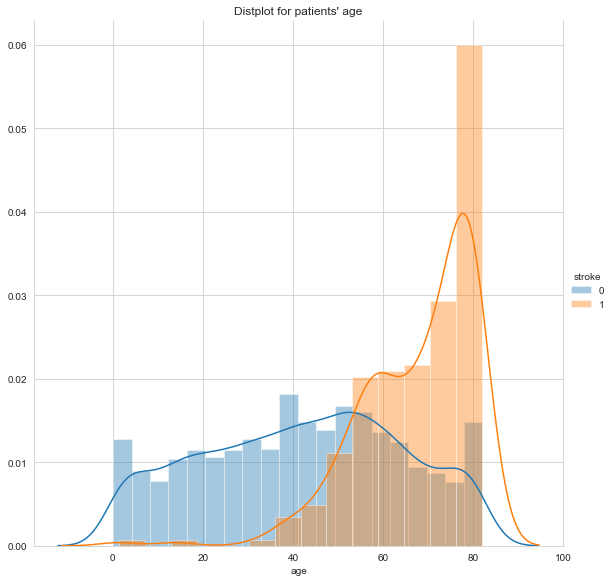

In [19]:
sns.FacetGrid(strokes_data, hue="stroke", height = 8).map(sns.distplot, "age").add_legend()
plt.title("Distplot for patients' age")
plt.show()

Observation:
    
    Generally, higher age increases the likely hood of a stroke.

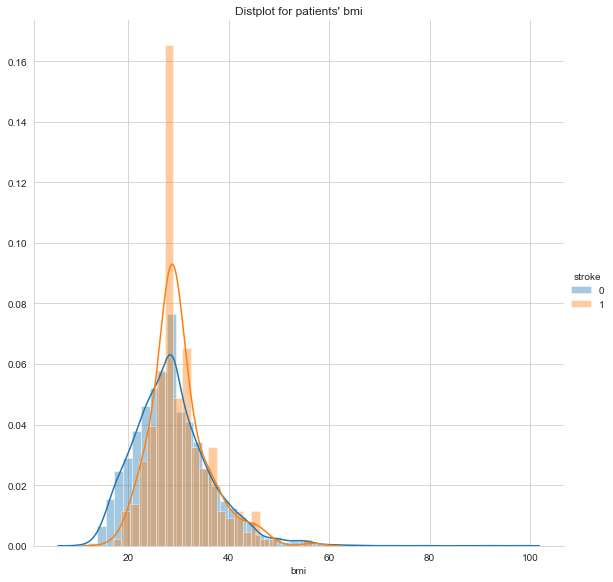

In [20]:
sns.FacetGrid(strokes_data, hue="stroke", height = 8).map(sns.distplot, "bmi").add_legend()
plt.title("Distplot for patients' bmi")
plt.show()

Observation:
    
    The BMI column by itself cannot be used to predict the likelyhood of a stroke.

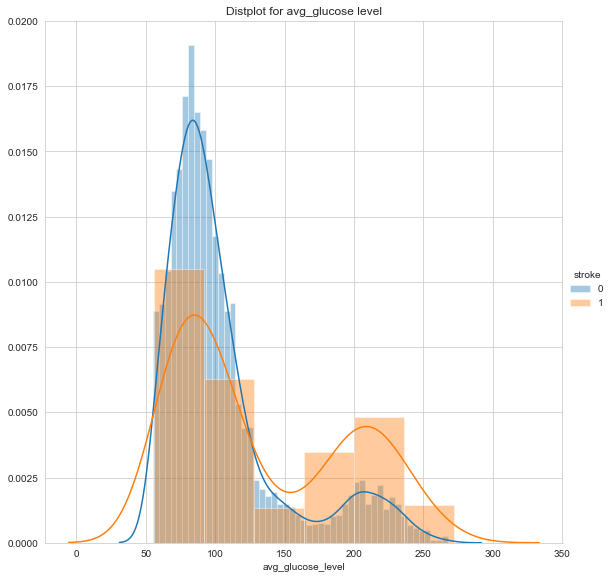

In [21]:
sns.FacetGrid(strokes_data, hue="stroke", height = 8).map(sns.distplot, "avg_glucose_level").add_legend()
plt.title("Distplot for avg_glucose level")
plt.show()

Observation:
    
    The avg_glucose_level column by itself cannot be used to predict the likelyhood of a stroke.

A box and whisker plot is a way of summarizing a set of data measured on an interval scale. It is often used in explanatory data analysis. This type of graph is used to show the shape of the distribution, its central value, and its variability.

NOTE: In the plot below, a technique call inter-quartile range is used in plotting the whiskers. Whiskers in the plot below do not correspond to the min and max values.

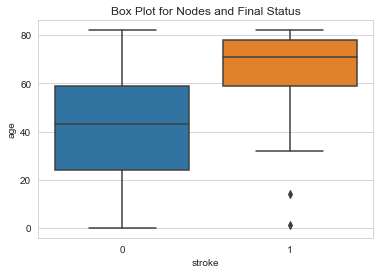

In [22]:
sns.boxplot(x='stroke',y='age', data=strokes_data)
plt.title('Box Plot for Nodes and Final Status')

plt.show()

Observation:

    The 75th Percentile of patients who did not suffer from stroke is equivalent to the 25th percentile of patients who suffered from a stroke.
    
    The 50th percentile and 75th percentile for the patients that are likely to get a stroke shares smaller gap when
    compared with 25th percentile and 50th percentile.

A violin plot is similar to a box plot , with the addition of a rotated kerkernel density plot on each side.

Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator. Typically a violin plot will include all the data that is in a box plot: a marker for the median of the data; a box or marker indicating the interquartile range; and possibly all sample points, if the number of samples is not too high.

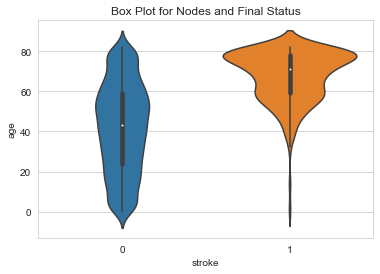

In [23]:
sns.violinplot(x='stroke',y='age', data=strokes_data)
plt.title('Box Plot for Nodes and Final Status')
plt.show()

Observation:
    
    The likely hood of getting a stroke is max when the patient's age is around 75-80

Conclusion:

    When used multiple columns, we can predict the likely hood of getting a stroke.

References:

https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

https://www.webmd.com/diabetes/qa/what-are-normal-blood-sugar-levels

https://seaborn.pydata.org/generated/seaborn.countplot.html

https://pythonbasics.org/seaborn-distplot/

https://blog.quantinsti.com/creating-heatmap-using-python-seaborn/
